## Численное интегрирование систем ОДУ явным методом Рунге-Кутты 1 и 4 порядков

#### Выполнил: Ефремов С.В.

С помощью явного метода Рунге-Кутты 1 и 4 порядков производится численное
интегрирование задачи Коши:

$$x''=-x+\varepsilon x'(1-x^2),~x_0=1,~x_0'=1,~\varepsilon\geq0.~~~~~~~(1)$$

### I. Численный метод

Задачу (1) можно записать в виде следующей системы:

$$\begin{cases}
   u'=v &\\
   v'=-u+\varepsilon v(1-u^2) & u_0=1, v_0=1~~~~~~~~(2)
 \end{cases}$$
 
Принимая обозначения $y=\begin{pmatrix}
  u\\
  v
\end{pmatrix}$, $f(t,y)=\begin{pmatrix}
 v\\
 -u+\varepsilon v (1-u^2)
\end{pmatrix}$, перепишем систему (2):

$$y'=f(t,y), y_0=\begin{pmatrix}
  1\\
  1
\end{pmatrix}.~~~~~~~~~(3)$$

Задача (3) решается численно с помощью метода Рунге-Кутты. Формула для метода первого
порядка имеет вид:

$$y_{n+1}=y_n+\tau f(t_n,y_n),~~~~~~~~~(4)$$

где $\tau~-$ шаг интегрирования, $t_n~-$ узел сетки,$y_n~-$ значение решения в этом узле. Вычисления
по методу 4 порядка производятся по формулам:

$$k_1=f(t_n,y_n)$$

$$k_2=f(t_n+\frac{\tau}{2}, y_n+\frac{\tau}{2}k_1)$$

$$k_3=f(t_n+\frac{\tau}{2}, y_n+\frac{\tau}{2}k_2)~~~~~~~~~~~(5)$$

$$k_4=f(t_n+\tau, y_n+\tau k_3)$$

$$y_{n+1}=y_n+\frac{\tau}{6}(k_1+2k_2+2k_3+k_4).$$

Шаг интегрирования 𝜏 выбирается исходя из желаемой точности. Поскольку нет возможности
сравнивать получаемый результат с аналитическим решением, погрешность результата
вычисляется следующим образом. Воспользуемся равенствами:

$$y^{(2\tau)}=y^*+C(2\tau)^k,$$

$$y^{(\tau)}=y^*+C(\tau)^k,$$

где $y^*$ — точное решение, $𝑦^{(2\tau)}$— решение с шагом интегрирования $2\tau$, $𝑦^{(\tau)}$ — решение с шагом
интегрирования $\tau$, $k$ — порядок метода. Вычитая из первого уравнения второе, получаем:

$$y^{(2\tau)}-y^{(\tau)}\approx C\tau^k(2^k-1)$$

или

$$\frac{y^{(2\tau)}-y^{(\tau)}}{2^k-1}\approx C\tau^k=y^{(\tau)}-y^*.$$

Отсюда для достижения требуемой точности для получаемого решения должно выполняться
неравенство:

$$\begin{Vmatrix}
  \frac{y^{(2\tau)}-y^{(\tau)}}{2^k-1}
\end{Vmatrix}\leq\varepsilon.~~~~~~~(6)$$

Если для текущего решения неравенство (6) не выполняется, производится измельчение сетки
в 2 раза и вычисление решения в соответствующих узлах.

### II. Программная реализация

Программа получает на вход 4 числа:
значение параметра $\varepsilon$, границы области интегрирования и желаемую точность. Функция $f(x, t,\varepsilon)$ вычисляет значение функции $f(t, y)$, определенной в задаче (3). Функции $RK_1(x_0, t, \varepsilon)$ и
$RK_4(x_0, t, \varepsilon)$ производят вычисление решения с начальным условием в левой границе
интегрирования $x_0$ в узлах сетки, задаваемых массивом $t$, по формулам (4) и (5)
соответственно. Функции $sol\_RK_1(x_0,T_0, T_1, N, e, \varepsilon)$ и $sol\_RK_4(x_0,T_0, T_1, N, e, \varepsilon)$ осуществляют
измельчение сетки в 2 раза и вызовы функций $RK_1$ и $RK_4$ до тех пор, пока для получаемого
решения не будет выполнено неравенство (6), в котором используется евклидова норма.
Изначально область интегрирования разбивается на 101 узел. Решение представляется в виде
массива пар чисел — значений $x$ и $x'$ в соответствующих узлах сетки. Получаемое решение
сравнивается с решением, получаемым при использовании функции odeint()стандартной
библиотеки SciPy.

In [2]:
import numpy as np
import math
import time
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def f(x, t, eps):
    u, v = x
    y = np.array([v, -u+eps*v*(1-u*u)])
    return y


def RK_1(x0, t, eps):
    sol_1 = np.empty((t.size, 2))
    sol_1[0] = x0
    for i in range(t.size-1):
        tau = t[i+1] - t[i]
        sol_1[i+1] = sol_1[i]+np.multiply(f(sol_1[i], t[i], eps), tau)
    return sol_1


def RK_4(x0, t, eps):
    sol_4 = np.empty((t.size, 2))
    sol_4[0] = x0
    for i in range(t.size-1):
        tau = t[i+1] - t[i]
        k_1 = f(sol_4[i], t[i], eps)
        k_2 = f(sol_4[i]+np.multiply(k_1, tau/2), t[i]+tau/2, eps)
        k_3 = f(sol_4[i]+np.multiply(k_2, tau/2), t[i]+tau/2, eps)
        k_4 = f(sol_4[i]+np.multiply(k_3, tau), t[i]+tau, eps)
        sol_4[i+1] = sol_4[i]+np.multiply(k_1+k_4+np.multiply(k_2+k_3, 2), tau/6)
    return sol_4


def sol_RK_1(x0,T0, T1, N, e, eps):
    R = e+1
    t = np.linspace(T0, T1, N//2 + 1)
    sol_tau = RK_1(x0, t, eps)
    while R > e:
        sol_2tau = sol_tau
        n_2tau = t.size
        t = np.linspace(T0, T1, n_2tau*2 - 1)
        sol_tau = RK_1(x0, t, eps)
        R = 0
        for i in range(n_2tau):
            R = max(R, math.sqrt((sol_tau[2*i, 0]-sol_2tau[i, 0])**2+(sol_tau[2*i, 0]-sol_2tau[i, 0])**2))
    return sol_tau


def sol_RK_4(x0,T0, T1, N, e, eps):
    R = e+1
    t = np.linspace(T0, T1, N//2 + 1)
    sol_tau = RK_4(x0, t, eps)
    while R > e:
        sol_2tau = sol_tau
        n_2tau = t.size
        t = np.linspace(T0, T1, n_2tau*2 - 1)
        sol_tau = RK_4(x0, t, eps)
        R = 0
        for i in range(n_2tau):
            R = max(R, (math.sqrt((sol_tau[2*i, 0]-sol_2tau[i, 0])**2+(sol_tau[2*i, 0]-sol_2tau[i, 0])**2))/15)
    return sol_tau


eps = 0
T0 = 0.0
T1 = 10.0
e = 0.1
N = 100
print('Значение параметра:')
eps = float(input())
print('Левая граница области интегрирования:')
T0 = float(input())
print('Правая граница области интегрирования:')
T1 = float(input())
print('Точность решения:')
e = float(input())
x0 = [1.0, 1.0]
start_1 = time.time()
sol_1 = sol_RK_1(x0, T0, T1, N, e, eps)
time_1 = time.time()-start_1
#print(sol_1.size//2)
#e = 0.0001
start_4 = time.time()
sol_4 = sol_RK_4(x0, T0, T1, N, e, eps)
time_4 = time.time()-start_4
t4 = np.linspace(T0, T1, sol_4.size//2)
start_0 = time.time()
sol = odeint(f, x0, t4, args=(eps,))
time_0 = time.time()-start_0
plt.plot(t4, sol_4[:, 0], 'b', label='RK_4')
#plt.plot(t4, sol[:, 0], 'g', label='scipy')
t1 = np.linspace(T0, T1, sol_1.size//2)
#print(t4.size)
plt.plot(t1, sol_1[:, 0], 'r', label='RK_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()
#print(max(np.abs(np.cos(t1)+np.sin(t1)-sol_1[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol_4[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol[:, 0])))
#print(time_1)
#print(time_4)
#print(time_0)
plt.plot(sol_1[:, 0], sol_1[:, 1], 'r', label='RK_1')
#plt.plot(sol[:, 0], sol[:, 1], 'g', label='scipy')
plt.plot(sol_4[:, 0], sol_4[:, 1], 'b', label='RK_4')
plt.legend(loc='best')
plt.ylabel('x\'')
plt.xlabel('x')
plt.grid()
plt.show()


Значение параметра:
0
Левая граница области интегрирования:
0
Правая граница области интегрирования:
10
Точность решения:
0.1


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### III. Исследование решений

Построим графики решений задачи (1) в области [0,10] для точности $\varepsilon$ = 0.001 при
значениях параметра $\varepsilon = 0$ (рис. 1) и $\varepsilon$ = 1 (рис. 2), а также графики траекторий в фазовом
пространстве.

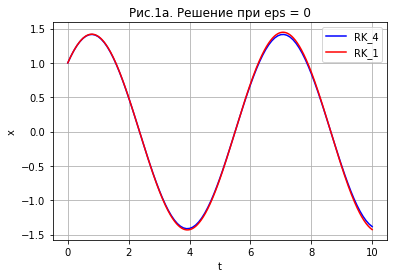

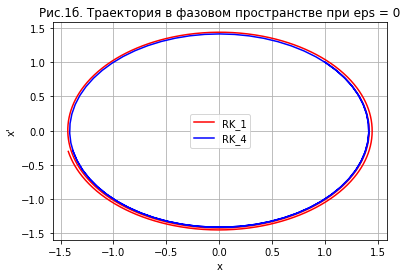

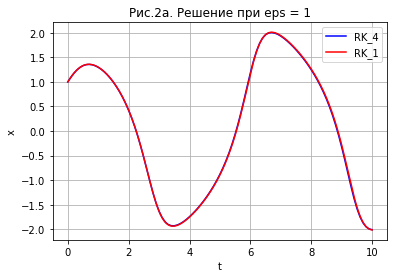

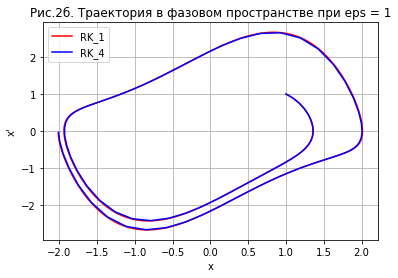

In [4]:
import numpy as np
import math
import time
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def f(x, t, eps):
    u, v = x
    y = np.array([v, -u+eps*v*(1-u*u)])
    return y


def RK_1(x0, t, eps):
    sol_1 = np.empty((t.size, 2))
    sol_1[0] = x0
    for i in range(t.size-1):
        tau = t[i+1] - t[i]
        sol_1[i+1] = sol_1[i]+np.multiply(f(sol_1[i], t[i], eps), tau)
    return sol_1


def RK_4(x0, t, eps):
    sol_4 = np.empty((t.size, 2))
    sol_4[0] = x0
    for i in range(t.size-1):
        tau = t[i+1] - t[i]
        k_1 = f(sol_4[i], t[i], eps)
        k_2 = f(sol_4[i]+np.multiply(k_1, tau/2), t[i]+tau/2, eps)
        k_3 = f(sol_4[i]+np.multiply(k_2, tau/2), t[i]+tau/2, eps)
        k_4 = f(sol_4[i]+np.multiply(k_3, tau), t[i]+tau, eps)
        sol_4[i+1] = sol_4[i]+np.multiply(k_1+k_4+np.multiply(k_2+k_3, 2), tau/6)
    return sol_4


def sol_RK_1(x0,T0, T1, N, e, eps):
    R = e+1
    t = np.linspace(T0, T1, N//2 + 1)
    sol_tau = RK_1(x0, t, eps)
    while R > e:
        sol_2tau = sol_tau
        n_2tau = t.size
        t = np.linspace(T0, T1, n_2tau*2 - 1)
        sol_tau = RK_1(x0, t, eps)
        R = 0
        for i in range(n_2tau):
            R = max(R, math.sqrt((sol_tau[2*i, 0]-sol_2tau[i, 0])**2+(sol_tau[2*i, 0]-sol_2tau[i, 0])**2))
    return sol_tau


def sol_RK_4(x0,T0, T1, N, e, eps):
    R = e+1
    t = np.linspace(T0, T1, N//2 + 1)
    sol_tau = RK_4(x0, t, eps)
    while R > e:
        sol_2tau = sol_tau
        n_2tau = t.size
        t = np.linspace(T0, T1, n_2tau*2 - 1)
        sol_tau = RK_4(x0, t, eps)
        R = 0
        for i in range(n_2tau):
            R = max(R, (math.sqrt((sol_tau[2*i, 0]-sol_2tau[i, 0])**2+(sol_tau[2*i, 0]-sol_2tau[i, 0])**2))/15)
    return sol_tau


eps = 0
T0 = 0.0
T1 = 10.0
e = 0.1
N = 100

x0 = [1.0, 1.0]
start_1 = time.time()
sol_1 = sol_RK_1(x0, T0, T1, N, e, eps)
time_1 = time.time()-start_1
#print(sol_1.size//2)
#e = 0.0001
start_4 = time.time()
sol_4 = sol_RK_4(x0, T0, T1, N, e, eps)
time_4 = time.time()-start_4
t4 = np.linspace(T0, T1, sol_4.size//2)
start_0 = time.time()
sol = odeint(f, x0, t4, args=(eps,))
time_0 = time.time()-start_0
plt.plot(t4, sol_4[:, 0], 'b', label='RK_4')
#plt.plot(t4, sol[:, 0], 'g', label='scipy')
t1 = np.linspace(T0, T1, sol_1.size//2)
#print(t4.size)
plt.plot(t1, sol_1[:, 0], 'r', label='RK_1')
plt.legend(loc='best')
plt.title("Рис.1а. Решение при eps = 0")
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()
#print(max(np.abs(np.cos(t1)+np.sin(t1)-sol_1[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol_4[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol[:, 0])))
#print(time_1)
#print(time_4)
#print(time_0)
plt.plot(sol_1[:, 0], sol_1[:, 1], 'r', label='RK_1')
#plt.plot(sol[:, 0], sol[:, 1], 'g', label='scipy')
plt.plot(sol_4[:, 0], sol_4[:, 1], 'b', label='RK_4')
plt.legend(loc='best')
plt.title("Рис.1б. Траектория в фазовом пространстве при eps = 0")
plt.ylabel('x\'')
plt.xlabel('x')
plt.grid()
plt.show()

eps = 1
T0 = 0.0
T1 = 10.0
e = 0.1
N = 100

x0 = [1.0, 1.0]
start_1 = time.time()
sol_1 = sol_RK_1(x0, T0, T1, N, e, eps)
time_1 = time.time()-start_1
#print(sol_1.size//2)
#e = 0.0001
start_4 = time.time()
sol_4 = sol_RK_4(x0, T0, T1, N, e, eps)
time_4 = time.time()-start_4
t4 = np.linspace(T0, T1, sol_4.size//2)
start_0 = time.time()
sol = odeint(f, x0, t4, args=(eps,))
time_0 = time.time()-start_0
plt.plot(t4, sol_4[:, 0], 'b', label='RK_4')
#plt.plot(t4, sol[:, 0], 'g', label='scipy')
t1 = np.linspace(T0, T1, sol_1.size//2)
#print(t4.size)
plt.plot(t1, sol_1[:, 0], 'r', label='RK_1')
plt.legend(loc='best')
plt.title("Рис.2а. Решение при eps = 1")
plt.xlabel('t')
plt.ylabel('x')
plt.grid()
plt.show()
#print(max(np.abs(np.cos(t1)+np.sin(t1)-sol_1[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol_4[:, 0])))
#print(max(np.abs(np.cos(t4)+np.sin(t4)-sol[:, 0])))
#print(time_1)
#print(time_4)
#print(time_0)
plt.plot(sol_1[:, 0], sol_1[:, 1], 'r', label='RK_1')
#plt.plot(sol[:, 0], sol[:, 1], 'g', label='scipy')
plt.plot(sol_4[:, 0], sol_4[:, 1], 'b', label='RK_4')
plt.legend(loc='best')
plt.title("Рис.2б. Траектория в фазовом пространстве при eps = 1")
plt.ylabel('x\'')
plt.xlabel('x')
plt.grid()
plt.show()



Сравним решения, получаемые различными методами при $\varepsilon = 0$, с аналитическим
решением, которое задается формулой: $x(t) = \cos t + \sin t.$ Для этого составим таблицу
сравнения необходимого числа узлов, времени работы метода и фактической точности
получаемого решения, выражающей максимальную разность между решением и
аналитическим решением в узлах сетки.


<table>
  <tr>
    <th style="text-align:center">~</th>
    <th colspan="3" style="text-align:center">RK_1</th>
    <th colspan="3" style="text-align:center">RK_4</th>
    <th colspan="3" style="text-align:center">SciPy: odeint</th>
  </tr>
  <tr>
    <td>Область</td>
    <td>Число узлов</td>
    <td>Время работы, с</td>
    <td>Точность решения</td>
    <td>Число узлов</td>
    <td>Время работы, с</td>
    <td>Точность решения</td>
    <td>Число узлов</td>
    <td>Время работы, с</td>
    <td>Точность решения</td>
  </tr>
  <tr>
    <td>[0,1]</td>
    <td>12801</td>
    <td>0.167</td>
    <td>$5\cdot10^{-5}$</td>
    <td>101</td>
    <td>0.004</td>
    <td>$2\cdot10^{-11}$</td>
    <td>101</td>
    <td>0.001</td>
    <td>$4\cdot10^{-8}$</td>
  </tr>
  <tr>
    <td>[0,10]</td>
    <td>$10^5$</td>
    <td>1.55</td>
    <td>$7\cdot10^{-4}$</td>
    <td>101</td>
    <td>0.004</td>
    <td>$10^{-5}$</td>
    <td>101</td>
    <td>0.001</td>
    <td>$10^{-7}$</td>
  </tr>
  <tr>
    <td>[0,10]</td>
    <td>$4\cdot10^5$</td>
    <td>6.3</td>
    <td>$2\cdot10^{-4}$</td>
    <td>401</td>
    <td>0.019</td>
    <td>$4\cdot10^{-8}$</td>
    <td>401</td>
    <td>0.001</td>
    <td>$10^{-7}$</td>
  </tr>
  <tr>
    <td>[0,50]</td>
    <td>$4\cdot10^5$</td>
    <td>5.6</td>
    <td>0.004</td>
    <td>1601</td>
    <td>0.084</td>
    <td>$6\cdot10^{-7}$</td>
    <td>1601</td>
    <td>0.002</td>
    <td>$10^{-6}$</td>
  </tr>
  <tr>
    <td>[0,100]</td>
    <td>$4\cdot10^5$</td>
    <td>6.3</td>
    <td>0.02</td>
    <td>3201</td>
    <td>0.192</td>
    <td>$10^{-6}$</td>
    <td>3201</td>
    <td>0.005</td>
    <td>$2\cdot10^{-6}$</td>
  </tr>
  <tr>
    <td>[0,1000]</td>
    <td>$8\cdot10^5$</td>
    <td>11.2</td>
    <td>1.2</td>
    <td>25601</td>
    <td>1.29</td>
    <td>$3\cdot10^{-5}$</td>
    <td>25601</td>
    <td>0.047</td>
    <td>$3\cdot10^{-5}$</td>
  </tr>
</table>

По полученным данным видно, что метод Рунге-Кутты 1 порядка значительно
проигрывает методу 4 порядка как в скорости, так и в точности, а для получения близкого к
аналитическому решению ему необходимо большое число узлов сетки. В свою очередь
реализованный алгоритм для подсчета методом Рунге-Кутты 4 порядка уступает в скорости
алгоритму, используемому в стандартной библиотеке.

Стоит отметить, что при относительно больших значениях параметра, достаточно
большой разности границ области интегрирования и недостаточной мелкости разбиения
может возникнуть ситуация, при которой в ходе вычисления решения происходит выход за
границы максимального значения, допустимого типом $float$ (больше, чем$~10^{300}$). Это
объясняется видом функции $f(t,,y)$, при сильном отклонении от точного решения ошибка
начинает накапливаться и расти экспоненциально.